In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/data_banknote_authentication.csv')
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
y = list(df['4'])
x1 = list(df['0']) 
x2 = list(df['1'])

Shuffling the data

In [ ]:
n = len(x1)
tmp = np.arange(n)
np.random.shuffle(tmp)
X1 = []
X2 = []
Y = []
for i in tmp:
  X1.append(x1[i])
  X2.append(x2[i])
  if(y[i] == 1):
    Y.append(1.0)
  else:
    Y.append(-1.0)
X1 = np.array(X1)
X2 = np.array(X2)
X = X1 , X2
Y = np.array(Y)
X = np.array(X)
X1 = (X1 - np.mean(X1)) / np.std(X1) 
X2 = (X2 - np.mean(X2)) / np.std(X2)
X1 , X2

(array([-1.98422876, -0.40201099, -0.7876674 , ...,  0.5272727 ,
         1.22793832, -0.05603117]),
 array([ 0.90961838, -1.27538284, -1.48910702, ...,  0.70223485,
        -0.88105243,  1.2436274 ]))

Perceptron algorithm

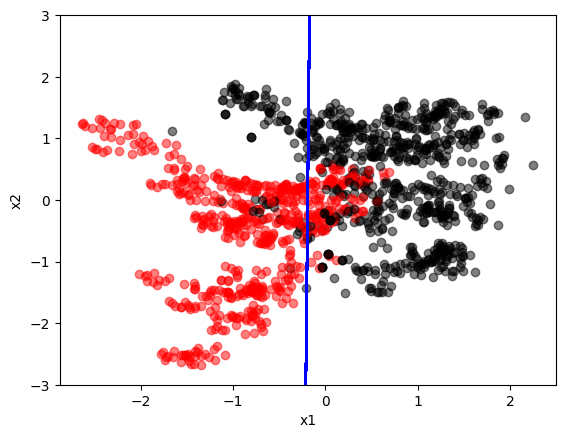

In [ ]:
def Perceptron():
  epoch = 100
  l = 0.0001
  w = 1.0 , 1.0
  b = 1.0 
  w = np.array(w)
  b = np.array(b)
  # print(Y.size)
  cost = []
  for i in range(epoch):
    err = 0
    for j in range(int(Y.size)):
      _x = X1[j] , x2[j]
      _x = np.array(_x)
      _x = _x.T
      _y = Y[j]
      z = w.T.dot(_x) + b
      if(z > 0):
        z = 1
      else:
        z = -1
      w -= l * _x.T.dot ((z -_y)) 
      b -= l * np.mean(z - _y)
      err += z != _y
    cost.append(err / Y.size)
  cost = np.array(cost)
  error = np.min(cost)
  return w , b , error
w_per , b_per, perceptron_error = Perceptron()
w1_per , w2_per = w_per
perceptron_boundary = (-b_per - ( w1_per * X1)) / w2_per
for i in range(len(Y)):
    if Y[i] == 1:
        plt.scatter(X1[i], X2[i], c='red', marker='o',alpha = 0.5)
    else:
        plt.scatter(X1[i], X2[i], c='black', marker='o',alpha = 0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X1, perceptron_boundary, color='blue', label='Decision Boundary')
plt.ylim([-3,3])
plt.show()


Adaline algorithm

-0.22662802402874074 -0.042483564563876614 7.168769836661499
[10.58484257  2.14452243  4.20180154 ... -2.81272936 -6.55042103
  0.29889755]
Adaline error : 0.2029856004154498 , Perceptron error : 0.15816326530612246


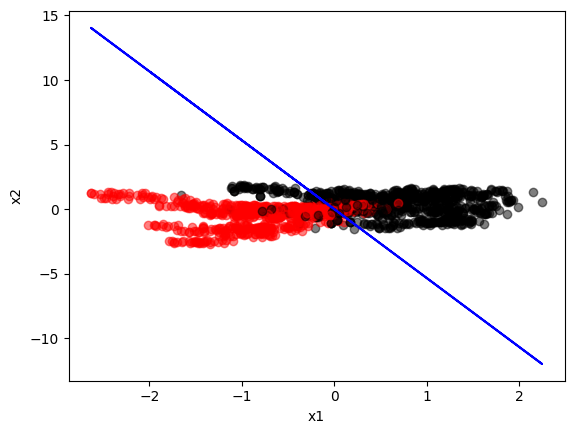

done


In [ ]:
def Adaline():
  epoch = 10000
  l = 0.001
  w = 1.0 , 1.0
  b = 1.0 
  w = np.array(w)
  b = np.array(b)
  n = Y.size
  cost = np.ones(epoch)
  for i in range(epoch):
    _x = X
    z = w.T.dot(_x)
    phiZ = z
    # print(_x.shape)
    # print(w.shape)
    # print(Y.shape)
    cost[i] = np.mean((phiZ - Y)**2) * 0.5
    w -= l * X.dot((phiZ - Y)) / n
    b -= l * np.mean(phiZ - y)
    if(cost[i] == 0):
      break
    # print(cost[i])
  return w , b , np.min(cost)
w , b , Adaline_error = Adaline()
w1 , w2 = w
print(w1 , w2, b)
Adaline_boundary = (- ( w1 * X1)) / w2
print(Adaline_boundary)
print(f'Adaline error : {Adaline_error} , Perceptron error : {perceptron_error}')
for i in range(len(Y)):
    if Y[i] == 1:
        plt.scatter(X1[i], X2[i], c='red', marker='o',alpha = 0.5)
    else:
        plt.scatter(X1[i], X2[i], c='black', marker='o',alpha = 0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X1, Adaline_boundary, color='blue', label='Decision Boundary')
plt.show()
print('done')